In [1]:
using DrWatson
@quickactivate

using Printf
using CairoMakie

function round_threedigits(x::Number)
	return round(x, digits=3)
end

round_threedigits (generic function with 1 method)

[Formeln](https://de.wikibooks.org/wiki/Formelsammlung_Physik)

# Übungszettel 1

## Gleichförmige Translation

In [2]:
# Ü1 - 1.1
v_kmh = 80
v = 80/3.6
t = 2 * 60

s = v * t |> x-> x/100 |> round_threedigits |> x-> "$x km" |> println

26.667 km


In [3]:
 ## Ü1 - 1.3
 d_cm = 3
 d = d_cm/100
 ⌀ = (d/2)^2 *π

 V = 300 / 1000
 t_min = 12

 fillspeed = V / t_min
 v = fillspeed / ⌀ |> round_threedigits

35.368

## Gleichmäßige beschleunigte Translation

In [4]:
# Ü1 - 2,1

# a
a = .5
v = 80 /3.6

# a(t) = v̇(t)
# v(t) = ∫a dt 
# v(t) = a⋅t + v₀ | v₀ = 0 → t = v(t)/a
# v(t) = ṡ(t) → s(t) = ∫v(t) dt
# s(t) = ∫a⋅ t + v₀ dt = 1/2⋅a⋅t² + v₀⋅ t

t = v/a |> round_threedigits 
t |> x-> "$x s" |> println


# b
s = .5 * a * t^2 |> round_threedigits
s |> x-> "$x m" |> println

44.444 s
493.817 m


In [5]:
# Ü1 - 2.3
s = 20
v = 20

# v(t_e) = 20 = a ⋅ t_e
# s(t_e) = 20 = 1/2 ⋅ a ⋅ t_e^2

# a = s(t_e)⋅ 2 /t_e^2 = 40/t_e^2
# 20 = 40/t_e^2 ⋅ t_e
# 20 = 40/t_e → t_e = 40/20 = 2
t = 2 |> x-> "$x s" |> println

2 s


In [6]:
# Ü1 - 2.7

t = 11.2
v = 90 /3.6

# a
k = a = v/t |> round_threedigits
a |> x-> "a: $a m/s²" |> println

# b
# s(t) = ∫∫a dt dt = 1/2 a t^2

s = .5 * a * t^2 |> round_threedigits
s |> x-> "b: $x m" |> println


a: 2.232 m/s²
b: 139.991 m


## Freier Fall + Würfe

In [7]:
# Ü1 - 3.1

h = 20
g = 9.81
# s = 1/2 a t^2 = 1/2 g t^2
# → t = √(2s/g)

t = √(2*h/g)

# v = g * t 
# v = √(2 g^2 * s/g) = √(2gs)
v = g * t |> round_threedigits
v |> x-> "$(x*3.6 |> round_threedigits) km/h" |> println

71.312 km/h


In [8]:
# Ü1 - 3.4

g = 9.81
h = 45

#h(t) = -.5 * g * t^2 + v * t = 45
#ḣ(t) = -     g * t   + v     = 0 
# g*t = v → t = v/g
#h(v) = -.5 * g * v^2/g^2 + v^2 / g = 45
#h(v) = v^2 * (2/2g - 1/2g) = v^2 * (1/2g)
# v^2 = h(t) * 2g ⇒ v = √(2gh)
v_0 = sqrt(2*g*h) |> round_threedigits |> x-> println("$x m/s")


29.714 m/s


In [9]:
# Ü - 3.7
g = 9.81

v_0 = 8
Δh = 3
#a

#v = a * t
# s = .5 * a * t^2 → a = 2s/t^2
# 				   → t = √(2s/a)
#v = 2s/t = 2s/√(2s/a) = √(2^2*s^2 / (2s/a)) = √(2sa)

v_vert = 2*Δh*g |> sqrt
v_ges = sqrt(v_0^2 + v_vert^2) |> round_threedigits
v_ges |> x-> "a: $x m/s" |> println

#b

angl = atand(v_0 / v_vert) |> round_threedigits
angl |> x-> "b: $x °" |> println

a: 11.084 m/s
b: 46.199 °


In [10]:
# Ü1 - 3.9
g = 9.81
v_hor = 15/3.6
Δh = 45

#a
# h(t) = -.5 * g * t^2 (+ v*t) = -45
# ⇒ t = √|2h(t)/g| = √(2*45/g)
t_hit = √(2 * Δh /g)
reach = t_hit * v_hor |> round_threedigits
println("a: $reach m")

#b
t_hit = t_hit |> round_threedigits
println("b: $t_hit s") 

a: 12.62 m
b: 3.029 s


In [11]:
# Ü1 - 3.12

g = 9.81

v_L0 = 8
a_L  = 4
Δh_innen = 3

#a 

# s(t) = .5 * a * t^2 = 3
# t = √(2s/a)
t = √(2 * Δh_innen/ (g + a_L)) |> round_threedigits
println("a: $t s")

#b
s_L = .5 * a_L * t^2 + v_L0 * t |> round_threedigits
println("b: $s_L m")

#c

# v(t) = -a * t + v_0 = 0 → a*t = v_0 → t = v_0/a
t_o_return = v_L0/g #|> round_threedigits

# s(t) = -.5 * a * t^2 + v_0 t
s = -.5 * g * t_o_return^2 + v_L0 * t_o_return

println("c: Umkehrpunkt:$(t_o_return)s\n   $s m nach oben")

a: 0.659 s
b: 6.141 m
c: Umkehrpunkt:0.8154943934760448s
   3.261977573904179 m nach oben


## Masse und Kraft

In [12]:
# Ü1 - 4.1

m = 100
a = -1.5

F = abs(m*a) |> round_threedigits
println("$F N")

150.0 N


In [13]:
# Ü1 - 4.4

s = 20
t = 4
m = 5

#a 
#s = .5 * a * t^2 → a = 2s/t^2
a = -2s/t^2
println("a: $a m/s^2")

#b

# v = a * t
v_0 = -a * t
println("b: $v_0 m/s")

#c
F = a *m
println("c: $F N")

a: -2.5 m/s^2
b: 10.0 m/s
c: -12.5 N


In [14]:
# 4.6

m = 20/1000
l = 60/100

v = 600

#a 

# s = .5 a t^2
#  v = a * t → t = v/a
# s = .5 a v^2 /a^2 → .5 * v^2 /a
# a  = .5 v^2 /s

a = .5 * v^2 /l
@printf "a: %.2E m/s^2\n" a

#b

# s(t) = 0.6
# s(t) = .5 * a * t^2
# t = √(2s(t)/a)

t = √(2*l/a)
@printf "b: %.2E s\n" t

#c
F = a * m
@printf "c: %.2E N\n" F


a: 3.00E+05 m/s^2
b: 2.00E-03 s
c: 6.00E+03 N


In [15]:
g = 9.81
F_G = 10^5
m = F_G/g
F = 700
μ = .005

F_res = 10^5 * μ
a = (F - F_res)/m
@printf "%.2E m/s^2" a

1.96E-02 m/s^2

## Mechanische Arbeit, Energieprinzip

In [16]:
# 6.1

m = 10
v = 20

#a

F = .1

a = F/m
# v = at
t = v/a

W = .5m * v^2
@printf "a: %.2E s\n" t 
@printf "W: %.2E J" W

a: 2.00E+03 s
W: 2.00E+03 J

In [17]:
# 6.12
g = 9.81
angld = 45
l = 2

Δh = tand(angld) * sin(angld) * 2

# E_pot = mgh
# E_kin = .5mv^2
# mgh = .5mv^2
# v^2 = 2gh
v = sqrt(2*g*Δh) |> round_threedigits
@printf "%.2E m/s" v


5.78E+00 m/s

## Leistung; Wirkungsgrad

In [18]:
g = 9.81
# 7.1
m = 850
t = 10 * 60
Δh = 20

W = m*g*Δh
P = W /t
@printf "%.2E W" P

2.78E+02 W

In [19]:
# 7.7.

g = 9.81
μ_ges = .9* .6
m = 270
P = 7E+3
P_kran = P * μ_ges

F_G = 270 * g
v   = P_kran/F_G
@printf "%.2E" v

1.43E+00

## Rotation

In [20]:
#8.1
v = 20 /3.6
d = 71.12 /100
r = d/2

ω = v/r
T = 2π/ω
f = 1/T

@printf "Drehzahl:    %.3E U/min\n" f*60
@printf "Umlaufdauer: %.1E s\n" T

Drehzahl:    1.492E+02 U/min
Umlaufdauer: 4.0E-01 s


In [21]:
# 8.9

v = 40 /3.6
F = 100

#a

# F = m*ω^2*r = m*v^2/r
# F ~ v^2 → v*2 ⇒ F*4

F_v2 = F * 4

@printf "a: %.2E N\n" F_v2

#b

# F ~ 1/r
# r*2 ⇒ F/2

F_r2 = F/2
@printf "b: %.2E N\n" F_r2

#c


@printf "c: r*4"

#

a: 4.00E+02 N
b: 5.00E+01 N
c: r*4

In [22]:
# 8.14

ΔE = 100
f_0 = 70 /60
f_1 = 200 /60

ω_0 = 2*π * f_0
ω_1 = 2*π * f_1

#  E = .5 * I * ω^2
I = 2*ΔE / (ω_1 - ω_0)^2 |> round_threedigits

1.079

## Hydrostatik, Auftrieb in Flüssigkeiten und Gasen

In [23]:
g = 9.81
ρ_wasser = 1020

p = 250 * 10^5

# p = ρ * h* g

h = p / (ρ_wasser * g) |> round_threedigits

2498.451

In [24]:
# 9.7


V = 100
ρ_ice = 920
ρ_wasser = 1020

m_ice = V * ρ_ice
V_w = m_ice /ρ_wasser

percent = V - V_w

@printf "%.2f %%" percent

9.80 %

# Übungszettel 2

## Harmonische Bewegung

In [25]:
A = 12
f = 15

#
func_i = A * sin(2π*f * .01)
@printf "E: %.02f cm" func_i

E: 9.71 cm

In [26]:
# 1.9

# T_P1:T_P2 = 19:20
# Δ * 15 = 3 → Δ = 1/5
Δ = 1/5
 @show f_P1 = Δ * 19
 @show f_P2 = Δ * 20

 @show T_P1 = 1/f_P1
 @show T_P2 = 1/f_P2

f_P1 = Δ * 19 = 3.8000000000000003
f_P2 = Δ * 20 = 4.0
T_P1 = 1 / f_P1 = 0.2631578947368421
T_P2 = 1 / f_P2 = 0.25


0.25

## Pendel

In [27]:
# 2.1

k = 25
# 25 U/min
f = 25/60
ω_0 = 2π * f

# ω_0 = √(k/m)
# → ω_0^2 = k/m 
# → m = k/ω_0^2

@show m = k /(ω_0^2) |> round_threedigits;


m = k / ω_0 ^ 2 |> round_threedigits = 3.648


In [28]:
# 2.2

k = 30
v_0 = .8
Â = 5 /100

# s(t) = Â * sin(ωt)
# v(t) = ω Â * cos(ωt)
# v(0) = ω * Â = .8
# ω * ̂5 = .8 →
ω = v_0/Â

# ω = √(k/m)
@show m = k/ω^2 |> round_threedigits

m = k / ω ^ 2 |> round_threedigits = 0.117


0.117

In [29]:
# 2.12
g = 9.81
m = 0.1
Δl = 1.5 /100

k = (g*m)/Δl
ω = √(k/m)
f = ω/2π
@show 1/f |> round_threedigits

1 / f |> round_threedigits = 0.246


0.246

In [30]:
# 2.13

g = 9.81
T_20  =32
T_0 = T_20/20

#T_0 = 2π * √(l/g)
@show l = (T_0/2π)^2 * g |> round_threedigits

l = (T_0 / (2π)) ^ 2 * g |> round_threedigits = 0.636


0.636

In [31]:
# ω  = 

## Gedämpfte Schwingung

In [32]:
A_1 = 10.5
A_3 = 9.9

k = √(A_3/(A_1))
@show A_8 = k^7* A_1 |> round_threedigits

A_8 = k ^ 7 * A_1 |> round_threedigits = 8.546


8.546

In [33]:
# A_50 = ŷ/2
# A_50/A_0 = 1/2
# k = 2^-1/50

k = 2^(-1/50)
@show k^10 * 100 |> round_threedigits

k ^ 10 * 100 |> round_threedigits = 87.055


87.055

## Wellen

In [34]:
# 4.1

E = 2.1*10^11
ϱ = 7800

E/ϱ |> sqrt |> round_threedigits

5188.745

In [35]:
# 4.3

# a 

c = 340
λ = 12/100

println("a: $(f = c/λ |> round_threedigits) s^-1")

# b 

T = 1/f
@printf "b: %.02E s" T/2

a: 2833.333 s^-1
b: 1.76E-04 s

In [36]:
# 4.5

v = 10/4
f = 5

λ = v/f |> println

0.5


In [37]:
# 5.3

f = 2000
c = 340

(
	# f' = f* c/c-v
	# .93f/f = c/c-v
	# .93c - .93v = c
	# .93v = -(c - .93c)
	-(c - .93c)/.93
	|> abs |> round_threedigits
) |> println


25.591


In [38]:
# 5.7

f = 1000
n = 2
c = 340

# f = n * c/2L

Δl_extrema = (n * c/(2*f) 
	|> L-> L/2
)

println("$Δl_extrema m")

0.17 m


### Kontrollfragen

- Ursache Welle:  
	
- Ursprung Welle:  
	*Erregerzentrum*
- harmonische Welle:  
	Welle der Form: $A * sin(\omega\cdot t)$
- Transversale vs Longitudinalwelle  
	Longitudinal: Modulation in gleicher richtung wie Ausbreitung  
- Erkläre  
	- Frequenz  
		*Schwingungen pro in Zeitraum (Hz bei Sekunde)*  
	- Wellenlänge    
		*räumlicher abstand zwischen zwei nulldurchgängen | maxima | minima*  
	- Ausbreitungsgeschwindigkeit  
		*beschreibt wie schnell sich die Welle im Raumfortbewegt*  
		
	Zusammenhang: $c = f\cdot\lambda$
- mögliche Aggregatzustände
	- Longitudinalwelle:
		- Fest
		- Flüssig
		- Gasförmig
	- Transversalwelle
		- Fest
- Einteilung Frequenz  
    - Infraschall f < 16 Hz
    - Hörschall 16 Hz < f < 20kHz  
    - Ultraschall 20kHz < f < 16 GHz
- Ton vs Klang  
    Ton genau eine f  
    Klang Grundton + Obertöne
- Tonhöhe vs Lautstärke  
	Tonhöhe von $f$ abhängig  
	Lautstärke von $\hat{A}$
- Erkläre  
    Grundton niedrigste f eines Klanges
	Obertöne sind ganzzahlige vielfache von einem Grundton  
	(e.g Grundton = 440 Hz, Obertöne = {880, 1360, 1760,...})
- Wellenfront  
	Die Fläche aller zusammenhängenden Punkte einer Welle
- Wellenstrahl  
	Die Abreitungsrichtung einer Welle
- Wann Wellenstrahlen parallel?  
	Wenn die Wellenfront Gerade verläuft und nicht Kreisförmig (ebene Wellenfront)
- Interferenz Bedingung
	Überlagerung mehrerer Wellen
- Kohärenz  
	Gleicher Phasenunterschied
- bedingung konstruktive/destruktive Interferenz  
	- Konstruktiv  
		$\Delta\lambda = k\cdot \lambda_1$
	- Destruktiv
		$\Delta\lambda = k\cdot\lambda_1 + \lambda_1/2$
- Huygen'sches Prinzip
	"Jeder Punkt an einer Wellenfront kann wieder als Ausgangspunkt einer neunen Welle betrachtet werden"
- Beugung
	Ablenkung einer Welle bei einem Hindernis
- Bedingung Beugung  
	$\lambda \approx d$  
	wobei d öffnung bei einem einfachspalt ist
- Reflexionsgesetz  
	$\alpha = \alpha'$
- Relexion über Huygen'sches prinzip
	Wenn eine Wellenfront auf eine Fläche trifft, so treffen manche Teilchen vor anderen auf die Fläche auf.  
	Diese können nun, durch das Huygen'sche Prinzip, als elementarwellen betrachtet werden, wenn ein anderer Punkt der Welle auf die Fläche auftrift,
	kann man eine linie finden, welche die Punkte miteinander verbindet, diese linie entspricht dem Reflexionsgesetz $\alpha = \alpha'$
- Brechung
	Änderung des Winkels, wenn eine Welle von einem Trägermedium in ein anderes Trägermedium mit anderer Dichte übergeht
- Brechungsgesetz  
	$\frac{sin(\alpha)}{sin(\beta)} = \frac{n_\alpha}{n_\beta}$  
	n...Brechungsindex  
- Grundfrequenz Saite
	- Länge
	- Dicke
	- Spannkraft
- Zusammenhang Wellenlänge und Länge v. Seite
- Eigenschwingungen entstehung  
	Durch Reflexionen
- Schallabstrahlung vergrößert
	Schwungkörper
- Warum Musikinstrumente unterscheiden
	Verschiedene Instrumente erzeugen verschiedene Oberschwingungen

# Schwingungen

In [39]:
# 6

g = 9.81
Δl = 1.5/100
m = .1

k = (g *m)/Δl
ω = √(k/m)
f = ω/2π
@show T = 1/f |> round_threedigits

T = 1 / f |> round_threedigits = 0.246


0.246

In [40]:
# 8

# m' = .5m
# ω = √k/m

# ω'/ω = √(2k/m) / k/m = √(2)

@printf "%.01f %%" √(2) - 1 |> x-> x*100


41.4 %

In [41]:
# 14
g = 9.81

l_1 = 25 /100
l_2 = 36 /100

T_1 = 2π * √(l_1/g)
T_2 = 2π * √(l_2/g)

# ω = 2π f = 2π/T
ω_1 = 2π/T_1
ω_2 = 2π/T_2

#@show T_1
#@show T_2

# sin(ω_1 t) = sin(ω_2 t)

Δω = ω_1 - ω_2 |> abs
@printf "a: %.2f s\n" t = 2π/Δω
@printf "\t %.2f s\n" (T_1 - T_2 |> abs)

n_1 = t/T_1
n_2 = t/T_2

@printf "b:\n\tn_1:\t%d\n\tn_2:\t%d" n_1 n_2

a: 6.02 s


	 0.20 s
b:
	n_1:	6
	n_2:	5

In [42]:
# 18

T_d = .72
I_d = 9.5 * 10^-5

T_add = 2.13

#T = 2π √(m*g*s/I)

# T_add/T_d = √(I_d + I_k/(I_d))
I_k = ((T_add/T_d)^2 - 1) * I_d

@printf "I_k = %.2E kg m^2" I_k

I_k = 7.36E-04 kg m^2

In [43]:
# 20

m = 8
T = .18
E = 196

ω = 2π/T
# ω = √(k/m)
k = ω^2 *m

# E = 1/2 * k * r^2
r = √(2*E/k)
@printf "r = %.2f m" r

r = 0.20 m

In [44]:
# 23

m_p = 1 *1000
m_l = 3 *1000
m = m_l + m_p
n = 6
k = 3.5 *10^5

ω = √(k*n/m)
f = ω/2π

@printf "f = %.2f Hz" f

f = 3.65 Hz

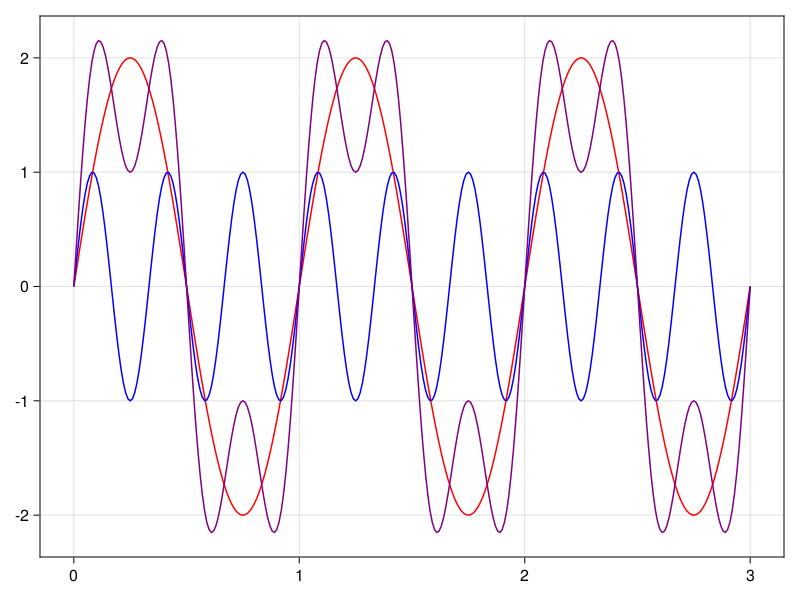

In [45]:
r_1 = 2
r_2 = 1

ω_1 = 2π
ω_2 = 3* ω_1

t = 0:.01:3

fig = Figure()
ax = fig[1, 1] = Axis(fig)

plot!(ax,
	t,
	t-> r_1 * sin(t* ω_1),
	color = :red
)
plot!(ax,
	t,
	t-> r_2 * sin(t* ω_2),
	color = :blue
)
plot!(ax,
	t,
	t->(
		r_1 * sin(t* ω_1) + r_2 * sin(t* ω_2)
	),
	color = :purple,
)
 fig

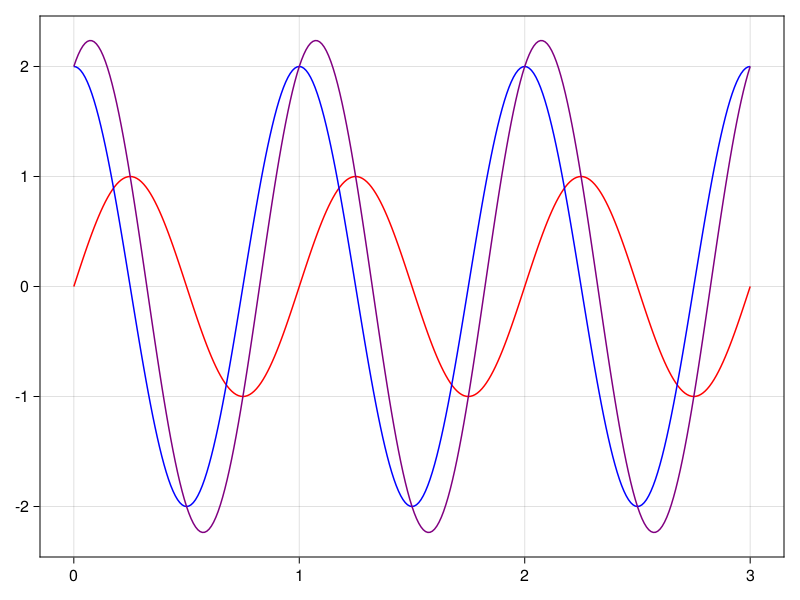

In [46]:
r_1 = 1
r_2 = 2

ω_1 = 2π
ω_2 = ω_1

Δϕ = π/2

t = 0:.01:3

fig = Figure()
ax = fig[1, 1] = Axis(fig)

plot!(ax,
	t,
	t-> r_1 * sin(t* ω_1),
	color = :red
)
plot!(ax,
	t,
	t-> r_2 * sin(t* ω_2 + Δϕ),
	color = :blue
)
plot!(ax,
	t,
	t->(
		r_1 * sin(t* ω_1) + r_2 * sin(t* ω_2 + Δϕ)
	),
	color = :purple,
)
 fig

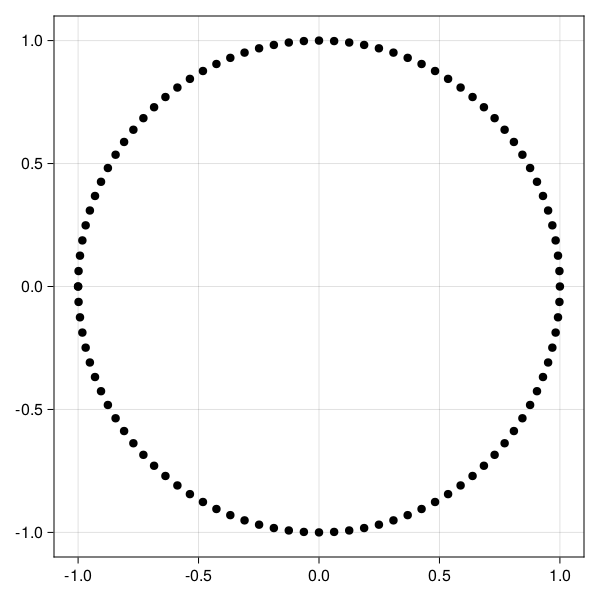

In [47]:
r_x = 1
r_y = 1

ω_x = 2π
ω_y = 2π

Δϕ  = 3π/2

t = 0:.01:1

x_s = map(t) do t
	r_x * sin(ω_x * t + Δϕ)
end

y_s = map(t) do t
	r_y * sin(ω_y * t)
end

fig = Figure(resolution = (600,600))
ax = fig[1, 1] = Axis(fig)

plot!(ax,
	x_s,
	y_s
)

fig

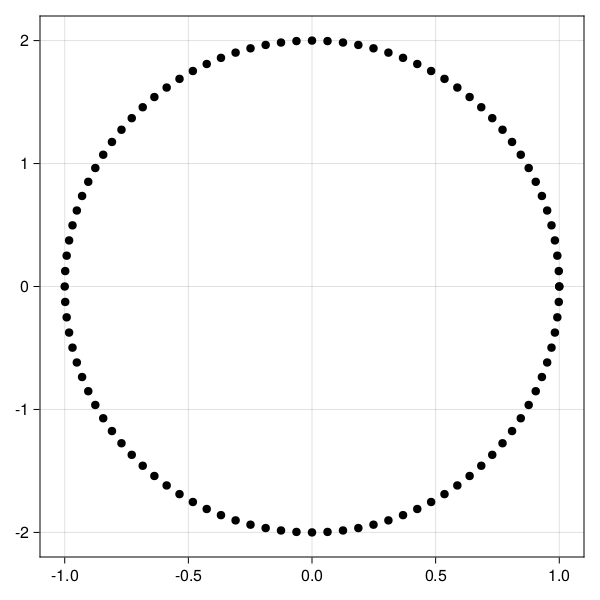

In [48]:
r_x = 1
r_y = 2

ω_x = 2π
ω_y = 2π

Δϕ  = π/2

t = 0:.01:1

x_s = map(t) do t
	r_x * sin(ω_x * t + Δϕ)
end

y_s = map(t) do t
	r_y * sin(ω_y * t)
end

fig = Figure(resolution = (600,600))
ax = fig[1, 1] = Axis(fig)

plot!(ax,
	x_s,
	y_s
)

fig

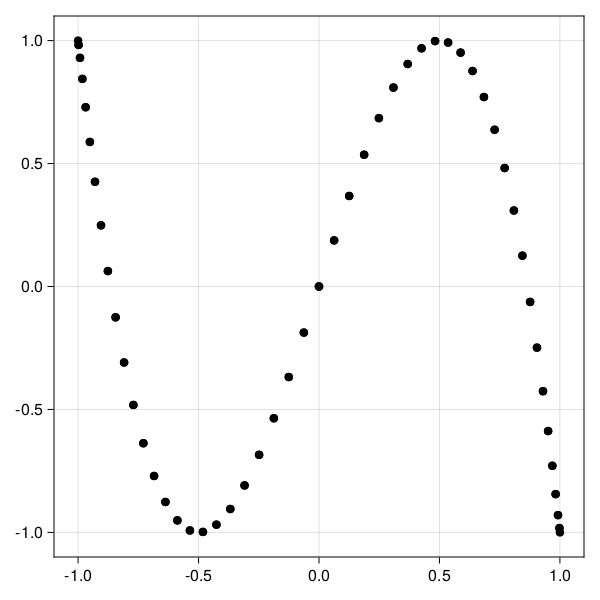

In [49]:
r_x = 1
r_y = 1

ω_x = 2π
ω_y = ω_x * 3

Δϕ  = 0

t = 0:.01:1

x_s = map(t) do t
	r_x * sin(ω_x * t + Δϕ)
end

y_s = map(t) do t
	r_y * sin(ω_y * t)
end

fig = Figure(resolution = (600,600))
ax = fig[1, 1] = Axis(fig)

plot!(ax,
	x_s,
	y_s
)

fig

# ÜWellen_1

In [50]:
# 42

c =  343.2
λ = 12 /100


f = c/λ

T = 1/f
t = T/2

@printf "a: %.2f Hz\n" f
@printf "b: %.2f ms\n" t * 1000

a: 2860.00 Hz
b: 0.17 ms


In [51]:
E = 2.1 * 10^11
ϱ = 7800

E/ϱ |> sqrt

5188.745216627708

In [52]:
# 31
ϱ = 7800
d = 2 /1000
Ψ = 2100

c = 2/d * √(Ψ/(π * ϱ))
@printf "c = %.2f m/s\n" c

c = 292.74 m/s


In [53]:
# 51

ΔM = 10 /100

λ = ΔM
c = 343.2

f = c/λ

3431.9999999999995

# Ü3

In [54]:
α  = 11.8 * 10^-6
l  = 300.137
ΔT = 50

Δl = α * l * ΔT

@printf "a: Nein, durch die Wärmeaußdehnung ändert sich die Höhe ständig\n"
@printf "b: %.2f m" Δl

a: Nein, durch die Wärmeaußdehnung ändert sich die Höhe ständig
b: 0.18 m

In [55]:
# 1.8

l = 3
Δl = .91/1000
ΔT = 60

α = Δl/(l * ΔT)

5.0555555555555555e-6

In [56]:
# 1.114

V = 1
α_glass = 9 * 10^-6
γ_turp  = 97 * 10^-5
γ_glass = 3 * α_glass

ΔT = 86-20

ΔV_g = ΔT * γ_glass * V
ΔV_t = ΔT * γ_turp  * V

ΔV = ΔV_g - ΔV_t |> abs

@printf "%.2f cm³" ΔV * 1000

62.24 cm³

In [57]:
# 4.4

g = 9.81

V = 160
m = 45
p = 97_000

R_s = 287

# pV = mR_s T 
# p = ϱ R_s T 
# ϱ = p/(R_s * T); p = const

ϱ = T-> p/(R_s * (T + 273.15))
invϱ = ϱ-> (p/(R_s * ϱ)) - 273.15

F_A = V * ϱ(10) * g
# F_G = F_A = m*g + ϱ(T) * V * g
# ϱ(T) = (F_A - m*g)/(V * g)

T = (F_A - m*g)/(V*g) |> invϱ

@printf "%.2f °C\n" T
@printf "%.2f K" T+273.15

97.28 °C
370.43 K

In [58]:
# 4.6

V = 4.8
p_1 = 3.85 *100
p_2 = 1.17 *100

T_1 = 24+273
T_2 = 22+273

# pV/T 
# p_1V/T_1 = p_2 (V + ΔV)/T_2
# V + ΔV = T_2/T_1 * p_1/p_2 *V
# ΔV = T_2/T_1 * p_1/p_2 * V - V
ΔV = T_2/T_1 * p_1/p_2 * V - V |> x-> round(x, digits=2)

10.89

In [59]:
T_1 = 18 + 273.15
p_1 = 1020 * 100
V_1 = 1200

V_2 = 2250
p_2 = 480* 100

# p_1V_1/T_1 = p_2V_2/T_2
# T_2 = (p_2V_2)/(p_1V_1) * T_1

T_2 = (p_2 * V_2)/(p_1 * V_1) * T_1 |> T_K-> T_K -273.15

@printf "%.2f °C" T_2

-16.25 °C